In [125]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.fft import rfft,rfftfreq,irfft

sns.set()

In [126]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y



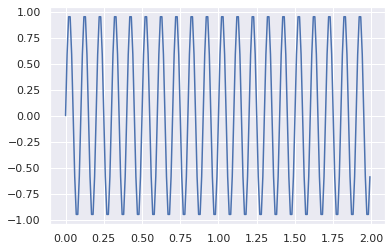

In [127]:
SAMPLE_RATE = 100
DURATION = 2
x,y = generate_sine_wave(10,SAMPLE_RATE,DURATION)

plt.plot(x,y)


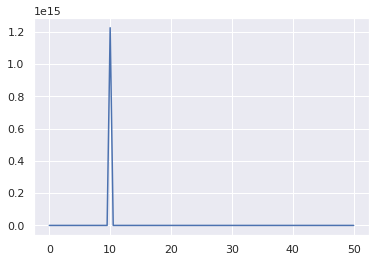

In [128]:
signal = y
signal = signal - signal.mean()
signal = signal

yf = rfft(signal) 
yf = yf / yf.max()

xf = rfftfreq(len(signal),1 / SAMPLE_RATE)

plt.plot(xf,np.abs(yf))

In [129]:
np.random.seed(666)

NR_DATA = 20
SAMPLE_RATE = NR_DATA // 10 # N data points in a unit of time #

s = pd.Series(np.random.randint(-1,2,NR_DATA))
s

0    -1
1     1
2     0
3     1
4     1
5     1
6     0
7     1
8    -1
9     0
10    1
11   -1
12   -1
13    1
14    0
15   -1
16    1
17   -1
18    0
19    1
dtype: int64

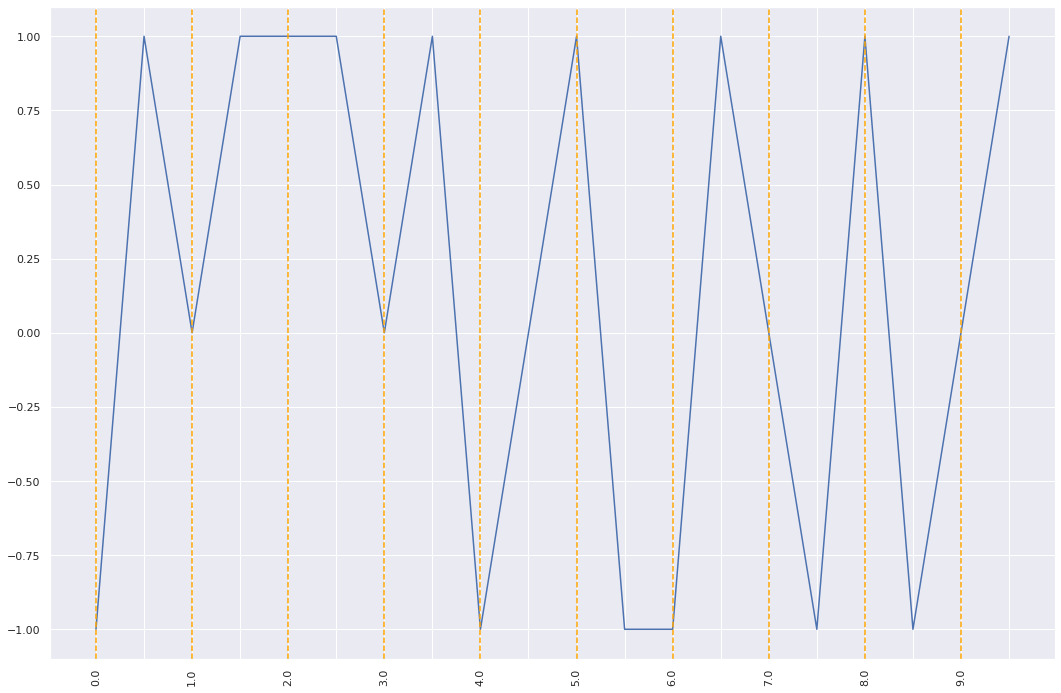

In [130]:
def numfmt(x, pos): # your custom formatter function: divide by 10.0
    s = '{:.1f}'.format(x / SAMPLE_RATE)
    return s

import matplotlib.ticker as tkr     # has classes for tick-locating and -formatting

plt.figure(figsize=(18,12))

plt.plot(s)
yfmt = tkr.FuncFormatter(numfmt)    # create your custom formatter function

ax = plt.gca()

_=plt.xticks(range(len(s)),range(1,len(s) + 1),rotation=90)
ax.xaxis.set_major_formatter(yfmt)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
    
for x_pos in range(len(s))[::SAMPLE_RATE]:
    plt.axvline(x_pos,ls='dashed',color='orange')

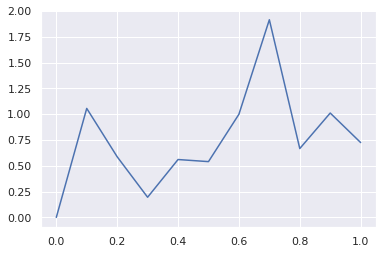

In [131]:
signal = s
signal = signal - signal.mean()
signal = signal.values

yf = rfft(signal) 
yf = yf / yf.max()

xf = rfftfreq(len(signal),1 / SAMPLE_RATE)

plt.plot(xf,np.abs(yf))